#Correlação e Regressão Simples/Multivariada

Sugestões de bibliotecas para serem utilizadas:
Pandas, NumPy, Seaborn, Matplotlib, Statsmodels, Scipy

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import scipy as scipy
import statsmodels

#Dataset KC House
Considerando a base de dados kc_house_data.csv responda as questões de 1
a 6 abaixo:

In [2]:
df_kc = pd.read_csv('kc_house_data.csv')

In [3]:
df_kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,n,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,n,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,n,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,n,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,n,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df_kc.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9.999000e+03,9.999000e+03,9999.000000,9999.000000,9999.000000,9.999000e+03,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,4.549550e+09,5.334366e+05,3.361636,2.061806,2053.088209,1.603696e+04,1.432043,0.238824,3.446345,7.594459,1749.596360,303.491849,1967.274427,91.642364,98077.970297,47.559852,-122.214626,1975.779178,13359.446945
std,2.863859e+09,3.770547e+05,0.916079,0.766884,911.227082,4.504326e+04,0.511869,0.766738,0.666322,1.165901,810.917694,450.852334,27.988987,417.830430,53.943113,0.140048,0.139017,672.264191,27316.491648
min,1.000102e+06,7.500000e+04,0.000000,0.000000,380.000000,5.720000e+02,1.000000,0.000000,1.000000,3.000000,380.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.515000,620.000000,660.000000
25%,2.114001e+09,3.150000e+05,3.000000,1.500000,1410.000000,5.427500e+03,1.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1950.000000,0.000000,98032.000000,47.461950,-122.326000,1490.000000,5417.500000
50%,3.905010e+09,4.458380e+05,3.000000,2.000000,1890.000000,7.920000e+03,1.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,1969.000000,0.000000,98065.000000,47.573100,-122.231000,1830.000000,7848.000000
75%,7.272001e+09,6.399500e+05,4.000000,2.500000,2500.000000,1.117550e+04,2.000000,0.000000,4.000000,8.000000,2130.000000,600.000000,1990.000000,0.000000,98118.000000,47.679400,-122.126500,2340.000000,10374.500000
max,9.842301e+09,7.700000e+06,11.000000,8.000000,12050.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,871200.000000


In [5]:
df_kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9999 non-null   int64  
 1   date           9999 non-null   object 
 2   price          9999 non-null   float64
 3   bedrooms       9999 non-null   int64  
 4   bathrooms      9999 non-null   float64
 5   sqft_living    9999 non-null   int64  
 6   sqft_lot       9999 non-null   int64  
 7   floors         9999 non-null   float64
 8   waterfront     9999 non-null   object 
 9   view           9999 non-null   int64  
 10  condition      9999 non-null   int64  
 11  grade          9999 non-null   int64  
 12  sqft_above     9999 non-null   int64  
 13  sqft_basement  9999 non-null   int64  
 14  yr_built       9999 non-null   int64  
 15  yr_renovated   9999 non-null   int64  
 16  zipcode        9999 non-null   int64  
 17  lat            9999 non-null   float64
 18  long    

In [6]:
#Transformando date de object para tipo data
df_kc['date'] = pd.to_datetime(df_kc['date'], format='mixed')
df_kc['date']

,date
0,2014-10-13
1,2014-12-09
2,2015-02-25
3,2014-12-09
4,2015-02-18
...,...
9994,2015-01-16
9995,2015-02-24
9996,2015-02-13
9997,2014-10-13


##Questão 1
Codifique e exiba a matriz de correlação entre as variáveis numéricas.
Além disso, qual é a correlação entre o preço price e o número de
quartos bedrooms? Existe alguma diferença na correlação quando
consideramos apenas casas com uma área total sqft_living superior a
2000 pés quadrados?

In [7]:
#Selecionando as variáveis numéricas
df_kc_num = df_kc.select_dtypes(include=['float64', 'int64'])

#Calculando a Matriz de Correçaão
corr_matrix = df_kc_num.corr()

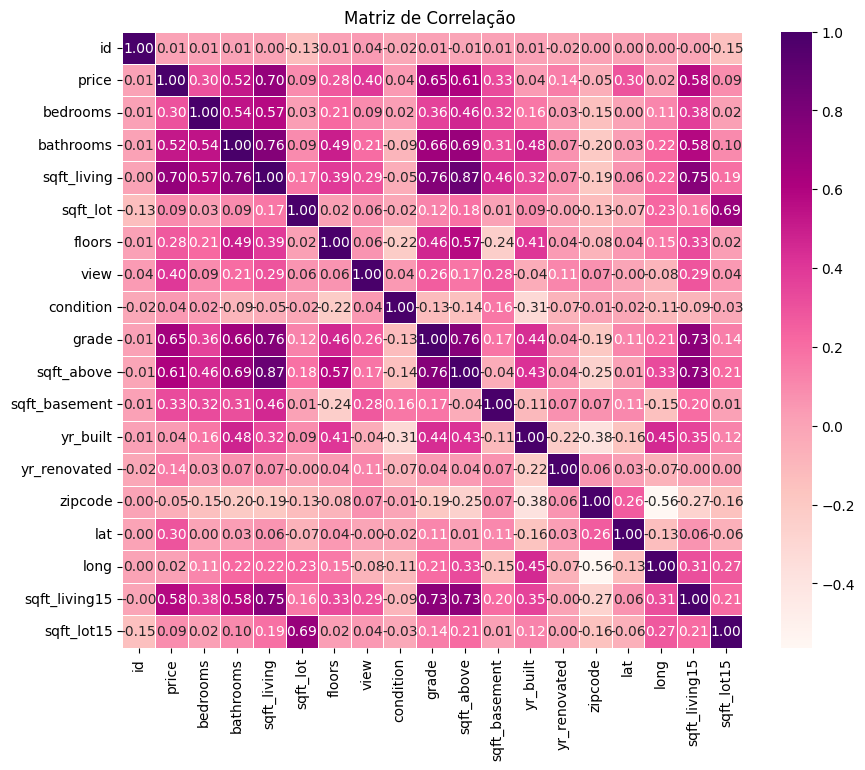

In [8]:
#Plotando o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdPu', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação ')
plt.show()

A correlação entre price e bedrooms é de 0.30, ou seja, uma correlação positiva.

Agora, iremos calcular a matriz de correlação filtrando pela área total acima de 2000:

In [9]:
#Filtrando o DF que já tinhamos com apenas as variáveis numéricas
df_sqft_2000 = df_kc_num[df_kc_num['sqft_living'] > 2000]

#Calculando a Matriz de Correçaão
corr_matrix_sqft = df_sqft_2000.corr()

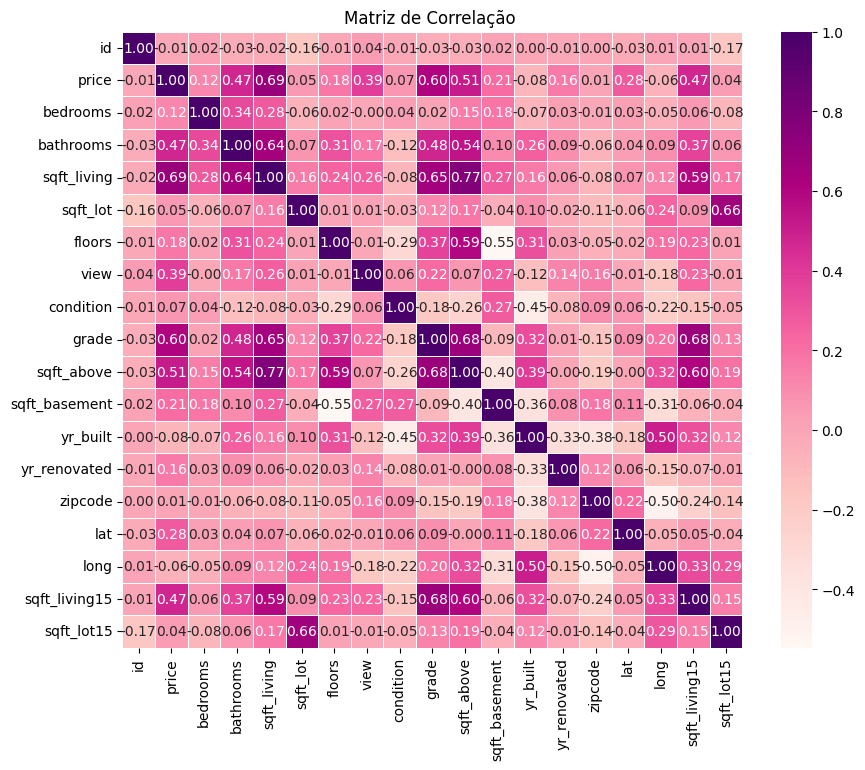

In [10]:
#Plotando o heatmap atualizado
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_sqft, annot=True, cmap='RdPu', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação ')
plt.show()

Fazendo o filtro pela área total acima de 2000 pés quadrados, a correlação entre price e bedrooms muda de 0.30 para 0.12

##Questão 2
Existe alguma correlação entre o preço price e a área total da casa sqft_living, considerando apenas casas com pelo menos dois banheiros bathrooms?

In [11]:
#Filtrando DF de variáveis numéricas pelas casa com pelo menos 2 banheiros
df_kc_bathrooms = df_kc_num[df_kc_num['bathrooms'] >= 2]

#Calculando a matriz de correlação
corr_matrix_bathrooms = df_kc_bathrooms.corr()

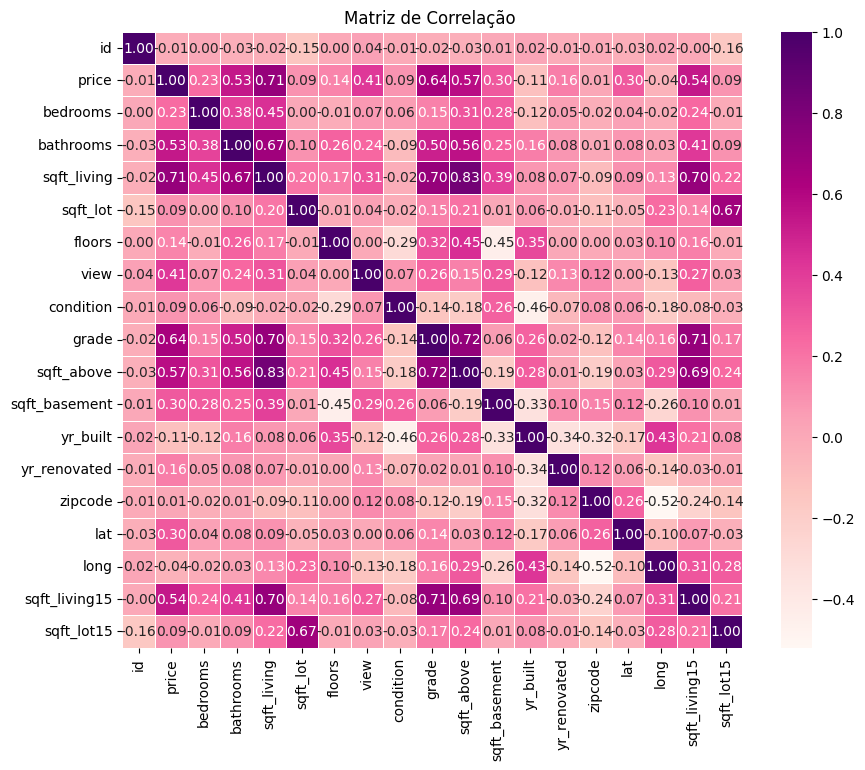

In [12]:
#Plotando o heatmap atualizado
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_bathrooms, annot=True, cmap='RdPu', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação ')
plt.show()

Podemos ver que filtrando o DF a correlação entre price e sqft_living é de 0.71, ou seja, uma correlação positiva.

##Questão 3
Como a quantidade de banheiros bathrooms influencia na correlação entre a área total da casa sqft_living e o preço price?

In [13]:
#Criando uma função que analisa a correlação entre o price e sqft_living
def corr_bath_g(data):
    bathrooms = data.groupby('bathrooms')[['price', 'sqft_living']].corr().unstack().iloc[:, 1]
    return bathrooms

corr_bath_agg = corr_bath_g(df_kc)
corr_bath_agg

,price
,sqft_living
bathrooms,
0.00,0.916837
0.50,NaN
0.75,0.357178
1.00,0.359529
1.25,0.167331
1.50,0.423405
1.75,0.449225
2.00,0.446945


##Questão 4
Qual é a relação entre a condição da casa condition e o preço price, considerando apenas casas com uma área total sqft_living superior a
3000 pés quadrados?

In [14]:
#Filtrando o DF que já tinhamos com apenas as variáveis numéricas
df_sqft_3000 = df_kc_num[df_kc_num['sqft_living'] > 3000]

#Calculando a Matriz de Correçaão
corr_matrix_sqft_2 = df_sqft_3000.corr()

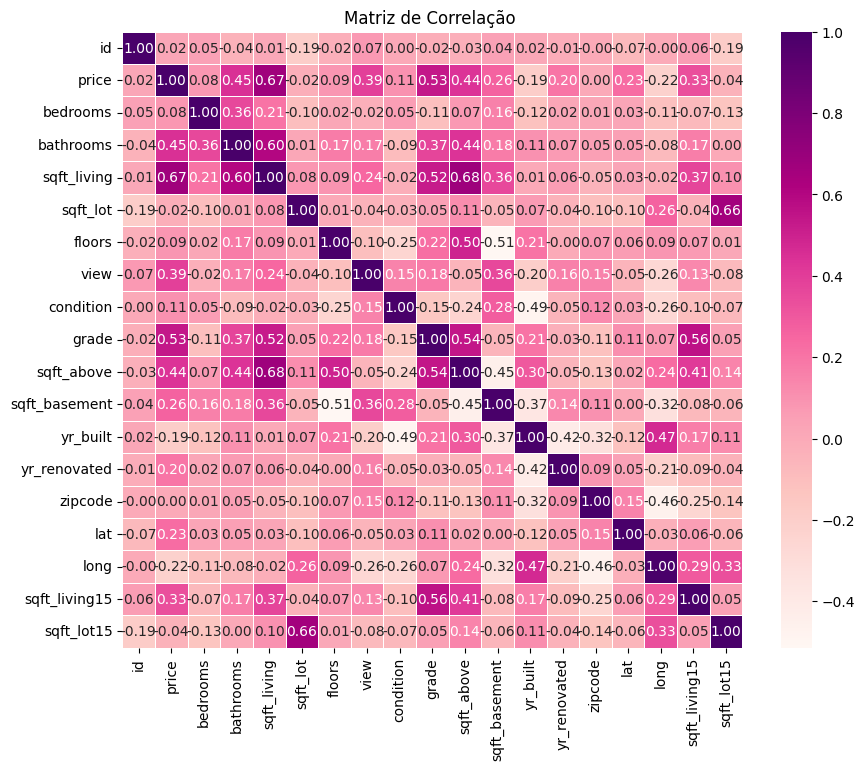

In [15]:
#Plotando o heatmap atualizado
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_sqft_2, annot=True, cmap='RdPu', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação ')
plt.show()

A correlação entre price e condition considerando o DF filtrando, é de 0.11.

##Questão 5
Existe alguma correlação entre a localização geográfica lat e long e o preço price para casas com pelo menos três quartos bedrooms?

In [16]:
#Filtrando o DF que já tinhamos com apenas as variáveis numéricas
df_loc_price = df_kc_num[df_kc_num['bedrooms'] >= 3]

#Calculando a Matriz de Correçaão
corr_matrix_loc_price = df_loc_price.corr()

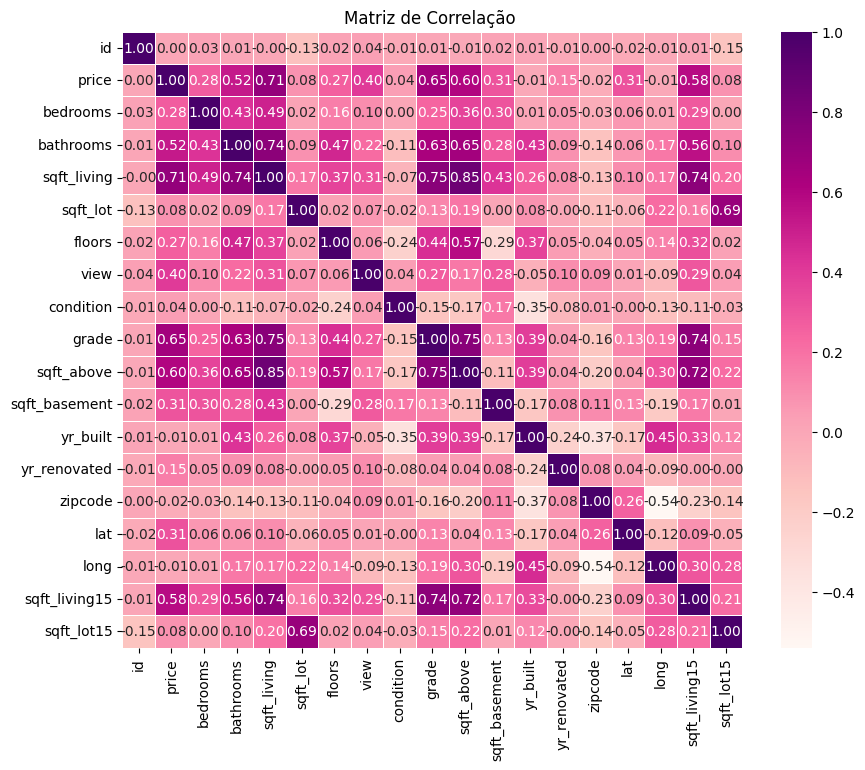

In [17]:
#Plotando o heatmap atualizado
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_loc_price, annot=True, cmap='RdPu', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação ')
plt.show()

A latitude apresenta uma correlação positiva com o preço de 0.31.

Enquanto a longitude, contém uma relação negativa com preço de -0.01.

##Questão 6
Calcule a correlação entre uma variável categórica(waterfront) e uma variável numérica(price) usando ANOVA

No Stackoveflow, encontrei um tópico que tratava sobre como calcular a correlação entre variáveis categóricas e numéricas utilizando ANOVA. Porém, estava em R:

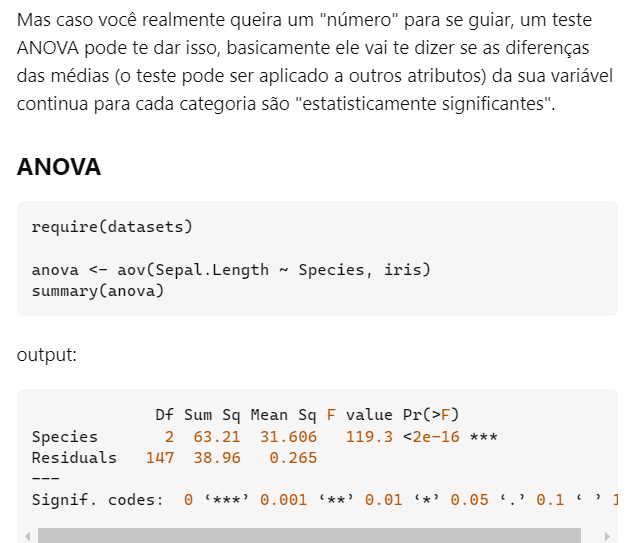

Com ajuda da IA, consegui fazer a tradução para Python

Basicamente aqui criamos a variável model que recebe o método ols do pacote statsmodels.

o código price ~ C(waterfront) realiza o teste de se a variável categórica waterfront afeta significativamente a variável númerica price.

o trecho "C(waterfront)" traduz para o Python que ela é uma variável categórica.

Nesse caso, o teste anova irá criar uma tabela com as seguintes colunas:

- sum_sq: soma dos quadrados
- df: graus de liberdade
- F: valor do teste F anova (se for alto, entendmos que há uma diferença entre as médias dos grupos)
- PR(>F): o p-value, onde podemos analisar se a diferença entre os grupos é significativamente diferentes

In [18]:
#Importando pacotes necessários
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [19]:
model = ols('price ~ C(waterfront)', data=df_kc).fit()
tabela_anova = sm.stats.anova_lm(model, typ=2)

tabela_anova

,sum_sq,df,F,PR(>F)
C(waterfront),1.250790e+14,1.0,964.573325,2.973808e-202
Residual,1.296339e+15,9997.0,NaN,NaN


In [20]:
#Exibindo o P-value em decimais
print(f'{tabela_anova["PR(>F)"][0]:.15f}')

0.000000000000000


<ipython-input-20-953ae8ded33b>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'{tabela_anova["PR(>F)"][0]:.15f}')


Com isso, podemos concluir que há uma diferença significativa entre a variável numérica price e a variável categórica waterfront, pois o p-value < 0.05.

Podemos também fazer um boxplot:

Text(0.5, 1.0, 'Preço das casas em relação se ela tem vista a beira-mar')

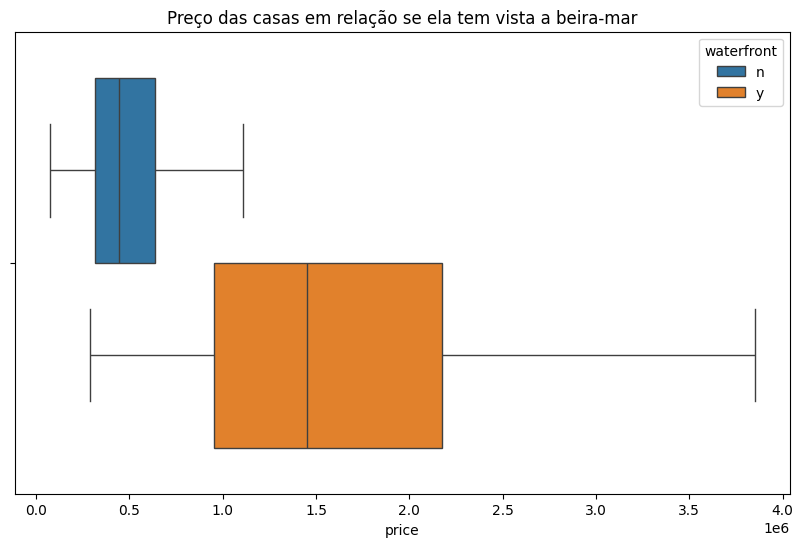

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(df_kc, x="price", hue="waterfront", showfliers = False).set_title('Preço das casas em relação se ela tem vista a beira-mar')

#Dataset Car Price
Considerando a base de dados car_price.csv responda as questões de 7 a 11
abaixo:

In [22]:
df_car = pd.read_csv('car_price.csv')

In [23]:
df_car.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [24]:
df_car.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,1.874000e+03,1874.000000,1.874000e+03,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000
mean,1.718279e+06,2016.713447,5.317814e+04,4281.512807,1767.886339,1588.967983,5.295091,52.217343
std,2.426090e+06,3.138477,5.878833e+04,436.220747,131.344883,134.627659,0.807008,15.167250
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1213.000000,2.000000,15.000000
25%,5.000000e+05,2015.000000,2.801975e+04,3985.000000,1695.000000,1485.000000,5.000000,42.000000
50%,8.424995e+05,2017.000000,4.879750e+04,4360.000000,1770.000000,1544.000000,5.000000,50.000000
75%,1.908250e+06,2019.000000,7.100000e+04,4620.000000,1831.000000,1670.750000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000


In [25]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1874 entries, 0 to 1873
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1874 non-null   object 
 1   Model               1874 non-null   object 
 2   Price               1874 non-null   int64  
 3   Year                1874 non-null   int64  
 4   Kilometer           1874 non-null   int64  
 5   Fuel Type           1874 non-null   object 
 6   Transmission        1874 non-null   object 
 7   Location            1874 non-null   object 
 8   Color               1874 non-null   object 
 9   Owner               1874 non-null   object 
 10  Seller Type         1874 non-null   object 
 11  Engine              1874 non-null   object 
 12  Max Power           1874 non-null   object 
 13  Max Torque          1874 non-null   object 
 14  Drivetrain          1874 non-null   object 
 15  Length              1874 non-null   float64
 16  Width 

##Questão 7
Codifique e exiba a Matriz de correlação para as variáveis numéricas e dê exemplos de correlações positivas, negativas e neutras.


In [26]:
#Selecionando as variáveis numéricas
df_car_num = df_car.select_dtypes(include=['float64', 'int64'])

#Calculando a matriz de correlação
corr_matrix_car = df_car_num.corr()

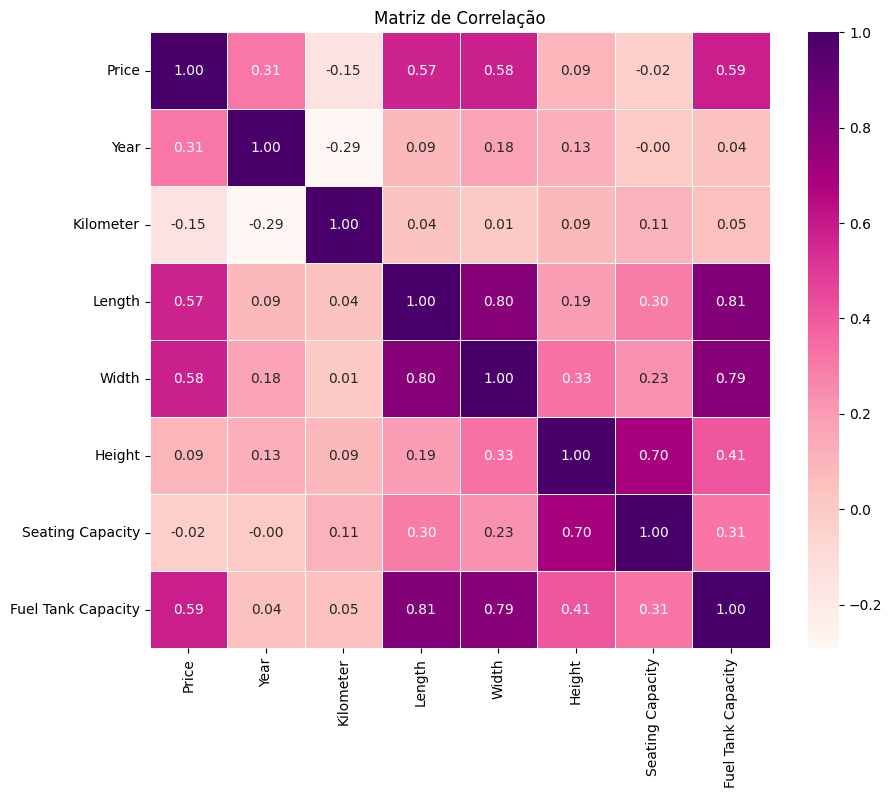

In [27]:
#Plotando o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_car, annot=True, cmap='RdPu', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

Observando o heatmap, podemos selecionar as seguintes correlações de exemplo:

Positiva: correlação entre lenght e fuel tank capacity, com 0.81, pois ela se aproxima bastante de 1.

Negativa: price e kilometer, com -0.15, pois está próximo de -1.

Neutra: seating capacity e year, com -0.00, pois se aproxima muito de 0.

##Questão 8
Codifique e exiba Gráficos de Dispersão para cada uma das variáveis numéricas em relação à variável de interesse Price

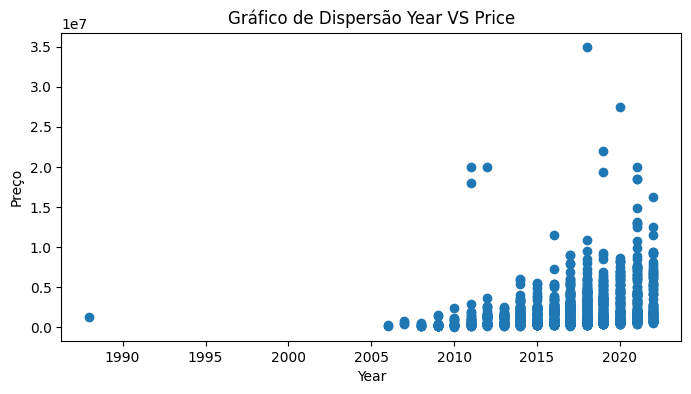

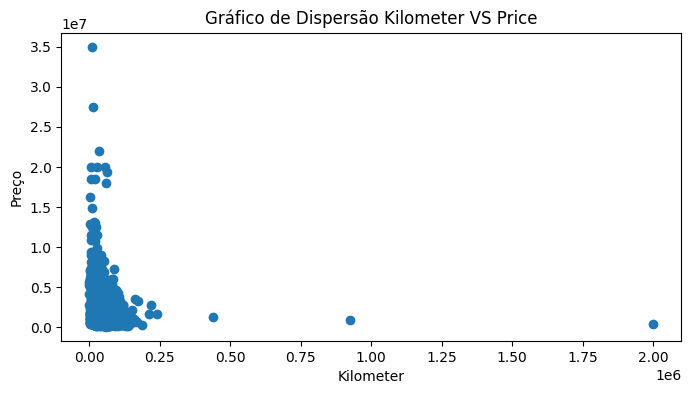

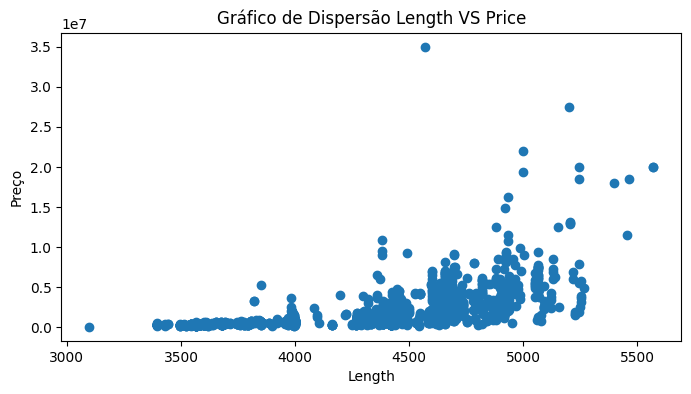

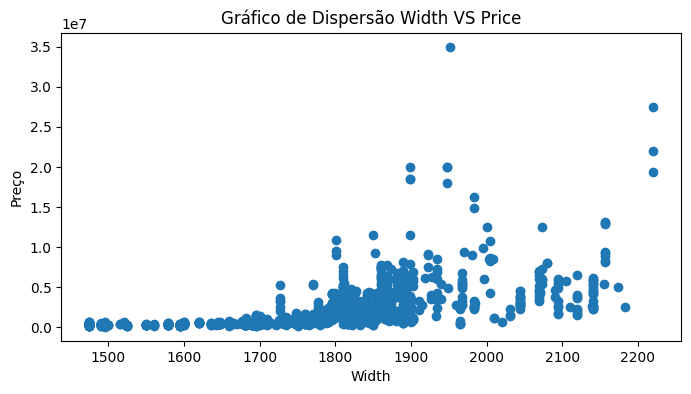

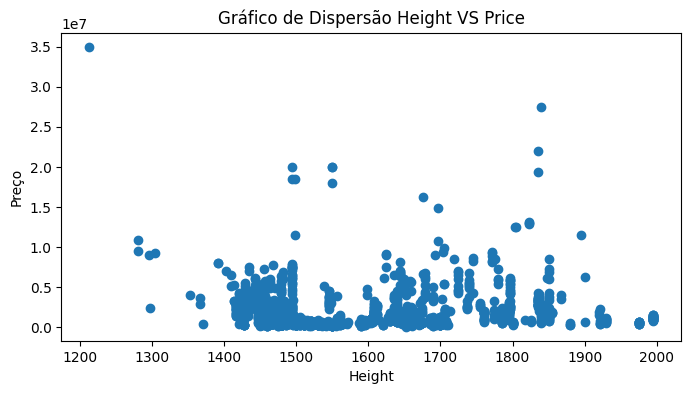

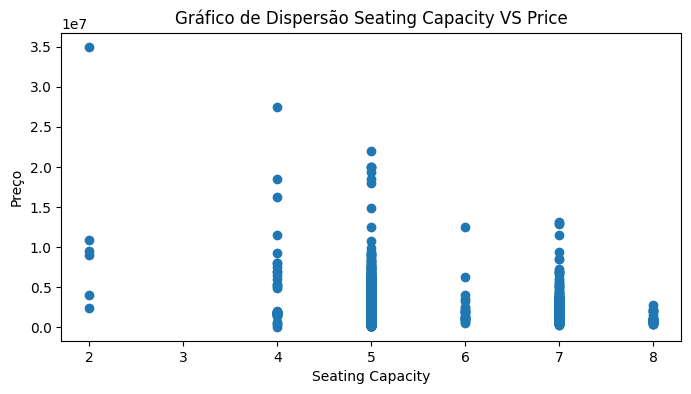

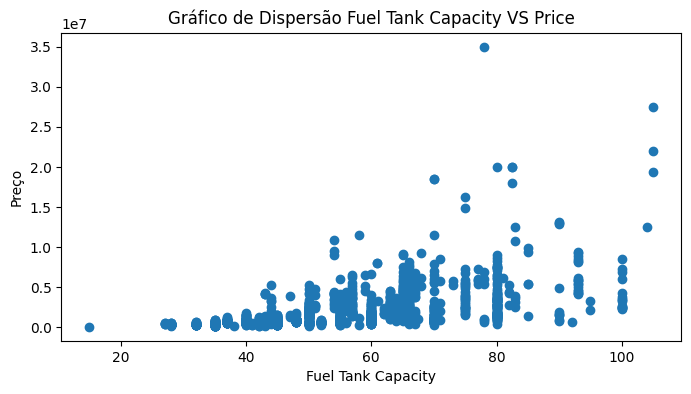

In [39]:
#Plotando o gráfico de dispersão iterando em cada coluna numérica, em relação ao preço, pois nesse caso, o preço é a variável de interesse
numeric_columns = df_car.select_dtypes(include=['number']).columns.tolist()
numeric_columns.remove('Price')

for col in numeric_columns:
  plt.figure(figsize=(8, 4))
  plt.scatter(df_car[col], df_car['Price'])
  plt.xlabel(col)
  plt.ylabel('Preço')
  plt.title(f'Gráfico de Dispersão {col} VS Price')
  plt.show()

##Questão 9
Crie um modelo de Regressão Linear Simples, exiba a Tabela de Regressão e exiba o plot da Reta Estimada.

In [59]:
#Definindo as variáveis X e Y + constante
X = sm.add_constant(df_car['Fuel Tank Capacity'])
Y = df_car['Price'] #variável price como a de interesse, a que queremos predizer

#Aplicando o modelo
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     979.6
Date:                Fri, 11 Oct 2024   Prob (F-statistic):          2.59e-173
Time:                        21:11:13   Log-Likelihood:                -29815.
No. Observations:                1874   AIC:                         5.963e+04
Df Residuals:                    1872   BIC:                         5.965e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.177e+06   1.63

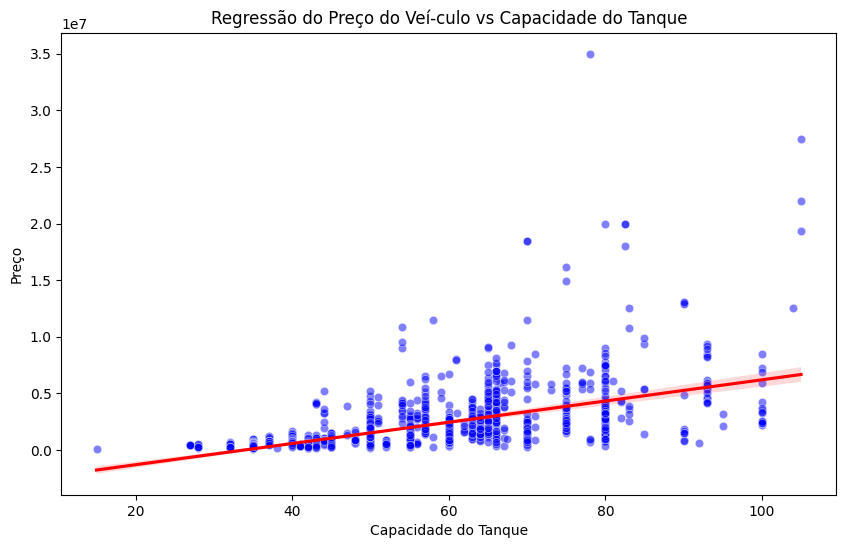

In [53]:
#Plotando a reta estimada
#var = 'Fuel Tank Capacity'
#sns.regplot(x=var, y='Price', data=df_car)

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_car, x='Fuel Tank Capacity', y='Price', color='blue', alpha=0.5)
sns.regplot(data=df_car, x='Fuel Tank Capacity', y='Price', scatter=False, color='red')
plt.title('Regressão do Preço do Veí­culo vs Capacidade do Tanque')
plt.xlabel('Capacidade do Tanque')
plt.ylabel('Preço')
plt.show()

##Questão 10
Codifique e exiba o gráfico dos resíduos do modelo de Regressão Simples.


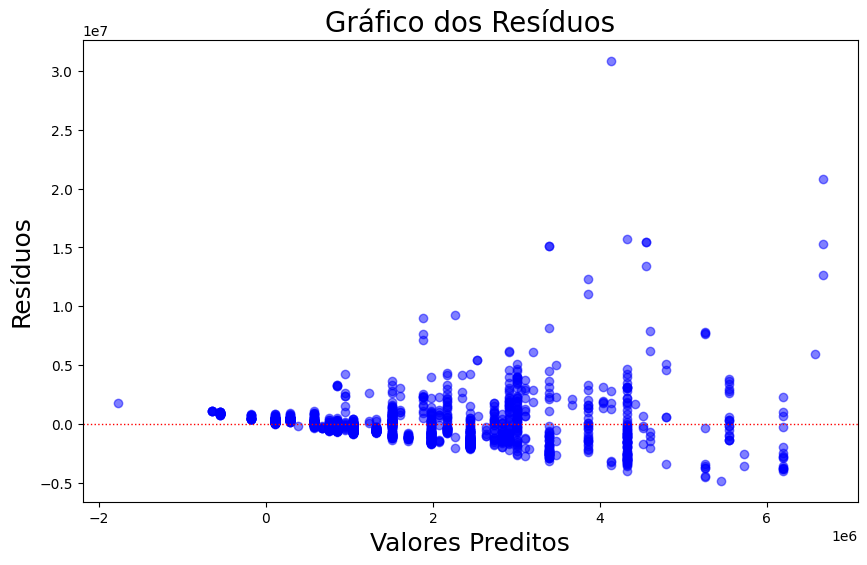

In [62]:
#Plotando o gráfico dos resíduos do modelo
y = model.predict(X)
residuals = Y - y

plt.figure(figsize=(10, 6))
plt.scatter(y, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle=':', lw=1)
plt.xlabel('Valores Preditos', fontsize=18)
plt.ylabel('Resíduos', fontsize=18)
plt.title('Gráfico dos Resíduos', fontsize=20)
plt.show()

##Questão 11
Crie um modelo de Regressão Multivariada, exiba a Tabela de Regressão e exiba o gráfico dos resíduos do modelo.

In [63]:
#Adicionando as constantes
X = sm.add_constant(df_car[numeric_columns])
Y = df_car['Price']

#Aplicando o modelo
mv_model = sm.OLS(Y, X).fit()
print(mv_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     270.7
Date:                Fri, 11 Oct 2024   Prob (F-statistic):          1.49e-278
Time:                        21:12:33   Log-Likelihood:                -29553.
No. Observations:                1874   AIC:                         5.912e+04
Df Residuals:                    1866   BIC:                         5.917e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.677e+08   2.77

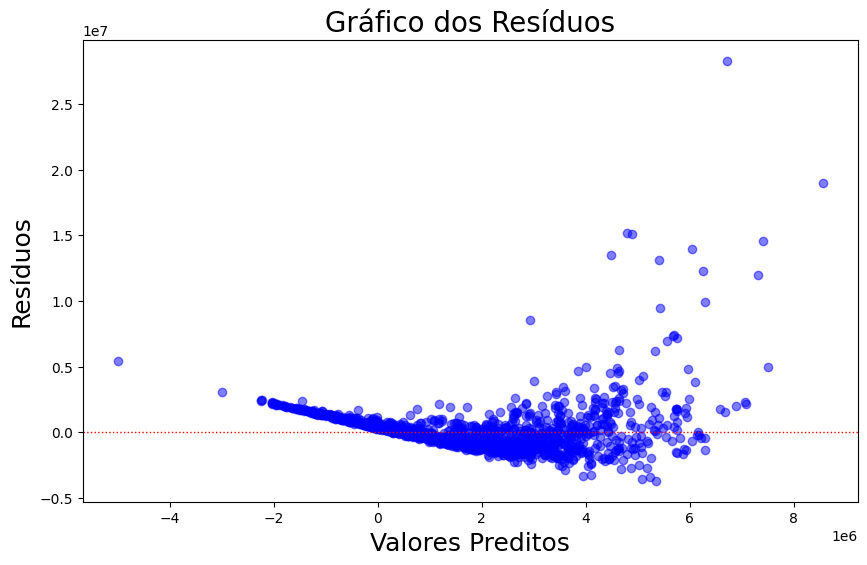

In [64]:
#Plotando o gráfico dos resíduos do modelo
y = mv_model.predict(X)
residuals = Y - y

plt.figure(figsize=(10, 6))
plt.scatter(y, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle=':', lw=1)
plt.xlabel('Valores Preditos', fontsize=18)
plt.ylabel('Resíduos', fontsize=18)
plt.title('Gráfico dos Resíduos', fontsize=20)
plt.show()